# SIMPLE LINEAR REGRESSION

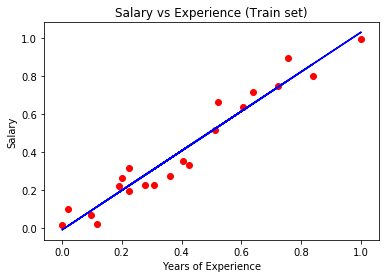

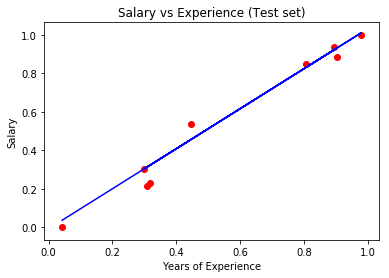

Training Accuracy:  0.9423777652193379
Testing Accuracy:  0.974099340721351
Model Evaluation:  0.5920284587713643


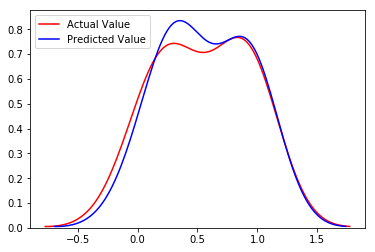

In [8]:
## y = b0.1+b1*x (Simple Linear Regression)
## y = b0.1 + b1*x1 + b2*x2 + b3*x3 + ... + bn*xn (Multiple Linear Regression)
## y = b0.1 + b1*x^1 + b2*x^2 + b3*x^3 + ... + bn*x^n (Polynomial Regression)
## y=dependent, x=independent, b1=slope, b0=intercept(constant)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
salary=pd.read_csv(r'C:\Users\c w\Desktop\Python\Salary_Data.csv')
salary=(salary-salary.min())/(salary.max()-salary.min())
x=salary[['YearsExperience']]
y=salary[['Salary']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(x_train, y_train)

# Predicting the Test set results
predicted = lr.predict(x_test)

# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test,predicted, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#Visualizing test set results
ax=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(predicted,hist=False,color='b',label='Predicted Value',ax=ax)

#Scoring
print('Training Accuracy: ',lr.score(x_train,y_train)) 
print('Testing Accuracy: ',lr.score(x_test,y_test))

#Model Evaluation
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=3)
print('Model Evaluation: ',np.mean(score))

# MULTIPLE LINEAR REGRESSION

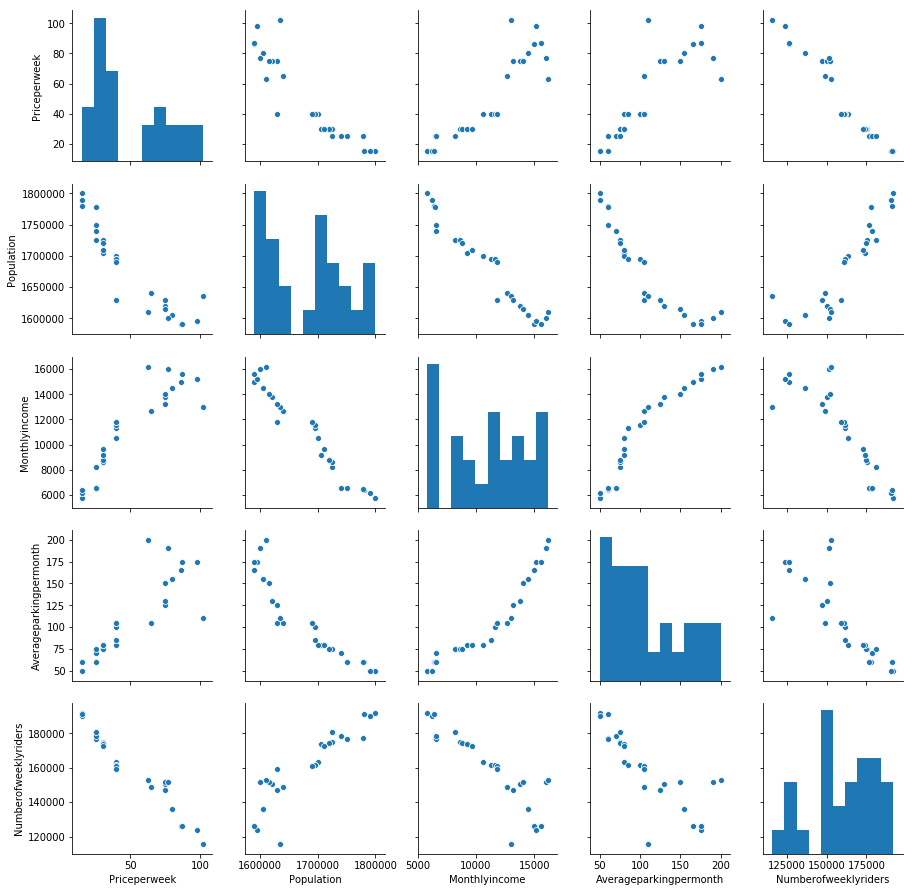

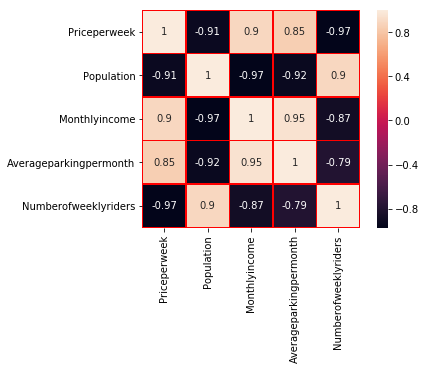

Regressor Coef:  [-5.68775893e+02  1.30158909e-01 -5.49376209e-02  1.22759763e+02]
Regressor Intercept:  -41535.70104644983
Train Score : 0.9428364724316813
Test Score: 0.9157379222488221
MSE : 49715820.672007665
RMSE : 7050.944665220943


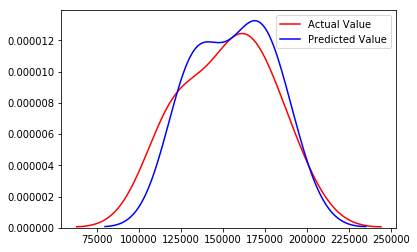

In [9]:
#Step 1 - Import the necessary libraries and the dataset
#Step 2 - Plot the Seaborn Pairplot
#Step 3 - Plot the Seaborn Heatmap
#Step 4 - Extract the Features and Labels
#Step 5 - Cross Validation (train_test_split)
#Step 6 - Create the Linear Model (LinearRegression)
#Step 7 - Interpreting the Coefficient and the Intercept
#Step 8 - Predict the output
#Step 9 - Predict the Score (% Accuracy)
#Step 10- Verification of the Predicted Value
#Step 11- Calculate the MSE and RMSE


#Step 1 - Import the necessary libraries and the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'C:\Users\c w\Desktop\Python\taxi.csv')

#Step 2 - Plot the Seaborn Pairplot
sns.pairplot(df)
plt.show()

#Step 3 - Plot the Seaborn Heatmap
sns.heatmap(df.corr(),linewidth = 0.2, vmax=1.0, square=True, linecolor='red',annot=True)
plt.show()

#Step 4 - Extract the Features and Labels

x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

#Step 5 - train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)


#Step 6 - Create the Linear Model (LinearRegression)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

#Step 7 - Interpreting the Coefficient and the Intercept
y_pred = regressor.predict(X_test)

#Step 8 - Interpreting the Coefficient and the Intercept

print('Regressor Coef: ',regressor.coef_)
print('Regressor Intercept: ',regressor.intercept_)

#Step 9 - Predict the Score (% Accuracy)

print('Train Score :', regressor.score(X_train,y_train))
print('Test Score:', regressor.score(X_test,y_test))


# Step 10- Verification of the Predicted Value

# y = b0 + b1*x1 + b2*x2 + b3*x3 + ... + bn*xn

# y_output0 = regressor.intercept_ + regressor.coef_[0]*X_test[0][0] + regressor.coef_[1]*X_test[0][1] + regressor.coef_[2]*X_test[0][2] + regressor.coef_[3]*X_test[0][3] 

# y_output1 = regressor.intercept_ + regressor.coef_[0]*X_test[1][0] + regressor.coef_[1]*X_test[1][1] + regressor.coef_[2]*X_test[1][2] + regressor.coef_[3]*X_test[1][3] 

#Step 11- Calculate the MSE and RMSE

from sklearn import metrics

print('MSE :', metrics.mean_squared_error(y_test,y_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


#Visualizing test set results
ax=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax)

# POLYNOMIAL REGRESSION

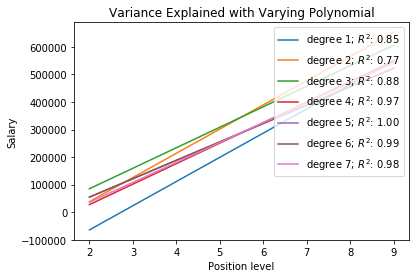

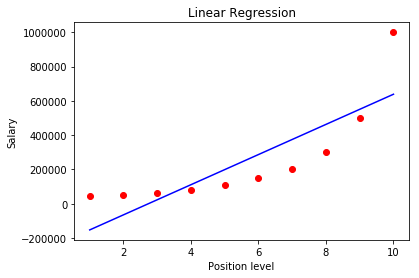

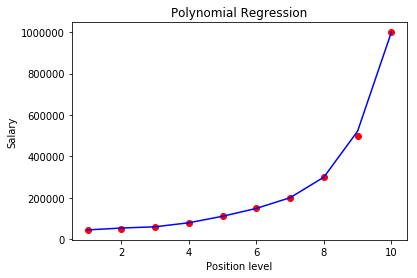

[522021.22443231  54054.35696389] [500000  50000]
Training Accuracy:  0.9999963953442634
Testing Accuracy:  0.9950481764356637


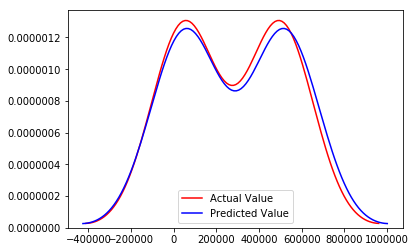

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Importing the dataset
dataset = pd.read_csv(r'C:\Users\c w\Desktop\Python\Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)"""

# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#TO CHECK WHICH DEGREE WE SHOULD USE
for degree in [1,2,3,4,5,6,7]:

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(X_train,y_train)

    y_plot = model.predict(X_test)

    plt.plot(X_test, y_plot, label="degree %d" % degree

             +'; $R^2$: %.2f' % model.score(X_test, y_test))

plt.legend(loc='upper right')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title("Variance Explained with Varying Polynomial")
plt.show()


# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Predicting a new result with Polynomial Regression
predicted=lin_reg_2.predict(poly_reg.fit_transform(X_test))
print(predicted,y_test)

print('Training Accuracy: ',lin_reg_2.score(X_poly,y_train)) 
print('Testing Accuracy: ',lin_reg_2.score(poly_reg.fit_transform(X_test),y_test))

# #Visualizing test set results
ax=sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(predicted,hist=False,color='b',label='Predicted Value',ax=ax)

# DECISION TREE REGRESSOR 

[1000000.]


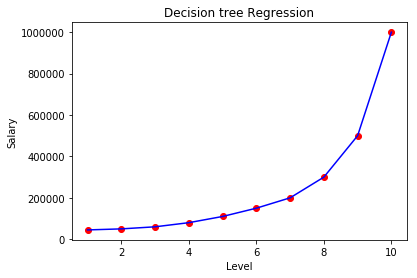

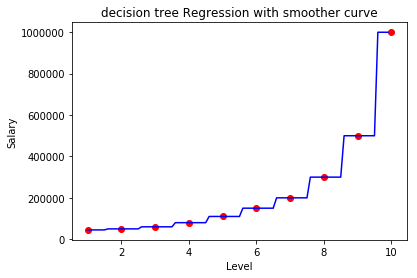

Training Accuracy:  1.0


In [6]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Importing the dataset
dataset = pd.read_csv(r'C:\Users\c w\Desktop\Python\Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:,2].values


#Fitting decision tree regression to dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)


#prediction of new value
y_pred = regressor.predict([[12]])
print(y_pred)

#visualisiong the Decision tree Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Decision tree Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()



#visualisiong the decision tree Regression for smoother curve results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('decision tree Regression with smoother curve')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

print('Training Accuracy: ',regressor.score(X,y)) 

# RANDOM FOREST REGRESSION

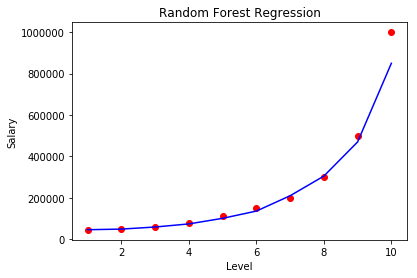

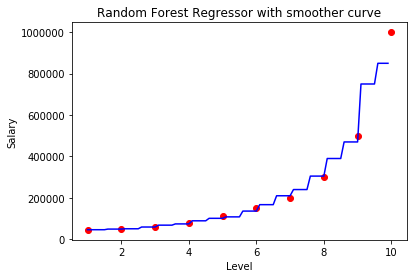

Training Accuracy:  0.9704434230386582


In [10]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Importing the dataset
dataset = pd.read_csv(r'C:\Users\c w\Desktop\Python\Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:,2].values


#Fitting decision tree regression to dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0,n_estimators=10)
regressor.fit(X, y)


#prediction of new value
y_pred = regressor.predict([[2]])

#visualisiong the random forest Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()



#visualisiong the random forest Regression for smoother curve results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Random Forest Regressor with smoother curve')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

print('Training Accuracy: ',regressor.score(X,y)) 